In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

In [15]:
model = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28,
    1)),
    Dropout(0.25),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Dropout(0.25),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [16]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [17]:
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)
print(x_train.shape)

(60000, 28, 28, 1)


In [18]:
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])
his = model.fit(x_train, y_train_cat, batch_size=32, epochs=50, 
                validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 91s 60ms/step - loss: 0.1462 - accuracy: 0.9545 - val_loss: 0.0712 - val_accuracy: 0.9837
Epoch 2/50
1500/1500 [==============================] - 89s 60ms/step - loss: 0.0513 - accuracy: 0.9838 - val_loss: 0.0495 - val_accuracy: 0.9870
Epoch 3/50
1500/1500 [==============================] - 88s 59ms/step - loss: 0.0357 - accuracy: 0.9888 - val_loss: 0.0442 - val_accuracy: 0.9877
Epoch 4/50
1500/1500 [==============================] - 89s 59ms/step - loss: 0.0285 - accuracy: 0.9901 - val_loss: 0.0386 - val_accuracy: 0.9898
Epoch 5/50
1500/1500 [==============================] - 88s 59ms/step - loss: 0.0228 - accuracy: 0.9926 - val_loss: 0.0324 - val_accuracy: 0.9901
Epoch 6/50
1500/1500 [==============================] - 89s 59ms/step - loss: 0.0193 - accuracy: 0.9934 - val_loss: 0.0364 - val_accuracy: 0.9886
Epoch 7/50
1500/1500 [==============================] - 89s 59ms/step - loss: 0.0171 - accuracy: 0.9942 - val_loss: 0.0422 -

In [19]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 4s 13ms/step - loss: 0.0559 - accuracy: 0.9912


[0.05594105273485184, 0.9911999702453613]

Saving ds4.jpg to ds4 (1).jpg
(224, 224, 3)
613


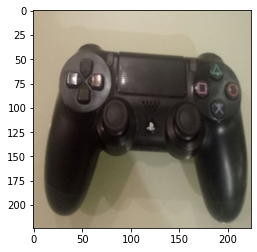

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from google.colab import files
from io import BytesIO
from PIL import Image
model = keras.applications.VGG16()
uploaded = files.upload()
img = Image.open(BytesIO(uploaded['ds4.jpg']))
plt.imshow(img)
# приводим к входному формату VGG-сети
img = np.array(img)
x = keras.applications.vgg16.preprocess_input(img)
print(x.shape)
x = np.expand_dims(x, axis=0)
# прогоняем через сеть
res = model.predict( x )
print(np.argmax(res))

In [ ]:
keke